In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

In [2]:
#функция поска в глубину в графе
def dfs(adjacency, vertex, visited = None, path = None): 
    if visited is None:
        visited = set()
    if path is None:
        path = []     
    visited.add(vertex)
    path.append(vertex)
    if vertex in adjacency:
        for neighbor in adjacency[vertex]:
            if neighbor not in visited:
                dfs(adjacency, neighbor, visited, path)
    return path

#функция поска циклов в графе
def cicle_search(graph, v):
    cicle = dict()
    visited=set()
    for vi in v:
        if vi in visited: continue
        else: 
            cicle[vi] = dfs(graph, vi)
            for vj in cicle[vi]: visited.add(vj)
    return [c for c in cicle.values()]

# преобразование Т
def T(x):
    return (2*x + 3)%7

#заданная на X функция
def f(x):
    return x**2
#задание графа преобразования
X = np.array([0, 1, 2, 3, 4, 5, 6])
graph = dict()
for x in X:
    graph[x] = [T(x)]
#поиск циклов
cicles = cicle_search(graph, X)
print(cicles)
#[[0, 3, 2], [1, 5, 6], [4]]

[[0, 3, 2], [1, 5, 6], [4]]


In [4]:
#функция поска в глубину в графе
def dfs(adjacency, vertex, visited = None, path = None): 
    if visited is None:
        visited = set()
    if path is None:
        path = []     
    visited.add(vertex)
    path.append(vertex)
    if vertex in adjacency:
        for neighbor in adjacency[vertex]:
            if neighbor not in visited:
                dfs(adjacency, neighbor, visited, path)
    return path

#функция поска циклов в графе
def cicle_search(graph, v):
    cicle = dict()
    visited=set()
    for vi in v:
        if vi in visited: continue
        else: 
            cicle[vi] = dfs(graph, vi)
            for vj in cicle[vi]: visited.add(vj)
    return [c for c in cicle.values()]

# преобразование Т
def T(x):
    return (2*x + 3)%7

#заданная на X функция
def f(x):
    return x**2

# k-e эргодическое среднее функции f c преобразованием T на множестве точек X
def Akf(f, T, k, X):
    #T^0(X), f(X)
    Tj_X = X.copy() 
    fTj = f(Tj_X)
    for j in range(1, k):
        #T^n(X), \sum_{j=1}^{n-1}f(T^j X)
        Tj_X = T(Tj_X)
        fTj+=f(Tj_X) 
        # n-e эргодическое среднее
        Akf = fTj/j
    return Akf

#задание графа преобразования
X = np.array([0, 1, 2, 3, 4, 5, 6])
graph = dict()
for x in X:
    graph[x] = [T(x)]
#поиск циклов
cicles = cicle_search(graph, X)
print(cicles)
#[[0, 3, 2], [1, 5, 6], [4]]

[[0, 3, 2], [1, 5, 6], [4]]


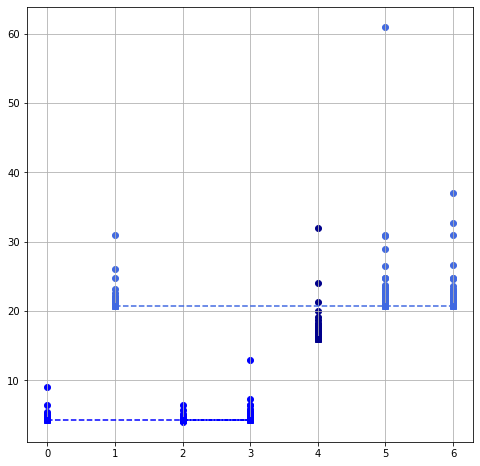

In [7]:
#построение изображения
fig = plt.figure(figsize=(8, 8))
# свой цвет для каждого цикла
cicle_colors = ['b', 'royalblue', 'darkblue'] 
# момент до которого вычисляем 
K = 61
x = np.array([1])
Anfx = []
for k in range(2, K):
    Anf = Akf(f, T, k, X)
    Anfx.append(Anf)
    for i, c in enumerate(cicles):
        plt.scatter(c, Anf[c], color = cicle_colors[i])
#просто среднее значение f на цикле
for i, c in enumerate(cicles):
    av = sum(f(np.array(c)))/len(c) # сумма значений функции на цикле разделённыя на длину цикла
    av_с = np.full(len(c), av)
    plt.plot(c, av_с, marker = 's', linestyle = '--', color = cicle_colors[i])

plt.grid()


plt.savefig('example1.png')

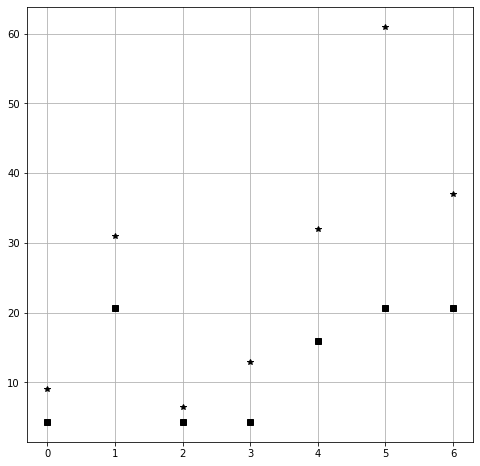

In [9]:
fig = plt.figure(figsize=(8, 8))
AV_C = []
C = []
for c in cicles:
    av = sum(f(np.array(c)))/len(c)
    for i in range(len(c)) : 
        AV_C.append(av)
        C.append(c[i])
plt.plot(C, AV_C, marker = 's', linewidth = 0, color = 'k')

Anfx = np.array(Anfx)
max(Anfx[:, 0])
supAnfx = [max(Anfx[:, i]) for i in range(len(X))]
plt.plot(X, supAnfx, color = 'k', linewidth = 0, marker = '*')
plt.grid()

plt.savefig('example1_0.png')


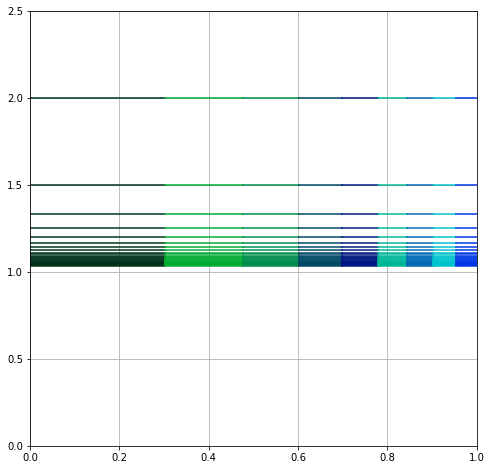

In [45]:
#преобразование
def T2(x): return (x+np.log10(2))%1
#характеристическая функция
def f2(x): return np.full(len(x), 1)
def Xi(i): return np.linspace(np.log10(i),np.log10(i+1), 10)

fig = plt.figure(figsize=(8, 8))
# момент до которого вычисляем 
K = 30
for i in range(1, 10):
    # цвет для характеристической функции нужного отрезка
    c1 = i/10
    c2 = np.random.rand()
    for k in range(2, K):
        Anf = Akf(f2, T2, k, Xi(i))
        plt.plot(Xi(i), Anf, color = (0, c2, c1))
    
plt.xlim((0, 1))
plt.ylim((0, 2.5))
plt.grid()
plt.savefig('example2_0.png')

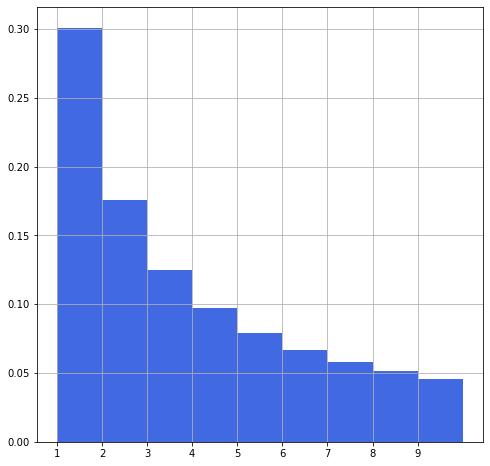

In [43]:
fig = plt.figure(figsize=(8, 8))
I = np.arange(1, 9.5, 1)
P = []
for i in range(1, 10):
    P.append(np.log10(i+1)-np.log10(i))
plt.hist(I,  range=(1, 10), bins = 9,weights=P, color = 'royalblue')
plt.grid()
plt.xticks(I)
plt.savefig('example2.png')

In [1]:
import os

from PIL.Image import open as load_pic, new as new_pic


def main(path, iterations, keep_all=False, name="arnold_cat-{name}-{index}.png"):
    """
    Params
        path:str
            path to photograph
        iterations:int
            number of iterations to compute
        name:str
            formattable string to use as template for file names
    """
    title = os.path.splitext(os.path.split(path)[1])[0]
    counter = 0
    while counter < iterations:
        with load_pic(path) as image:
            dim = width, height = image.size
            with new_pic(image.mode, dim) as canvas:
                for x in range(width):
                    for y in range(height):
                        nx = (2 * x + y) % width
                        ny = (x + y) % height

                        canvas.putpixel((nx, height-ny-1), image.getpixel((x, height-y-1)))

        if counter > 0 and not keep_all:
            os.remove(path)
        counter += 1
        print(counter, end="\r")
        path = name.format(name=title, index=counter)
        canvas.save(path)
        # print(width, height)

    return canvas


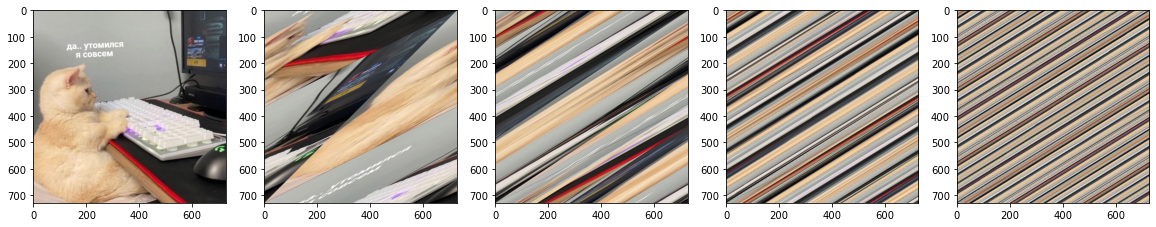

In [18]:
if __name__ == "__main__":
    path = 'arnold-cat-0.jpg'
    iterations = 5
    fig, ax = plt.subplots(1, iterations, figsize = (20, 40))
    ax[0].imshow(plt.imread(path))
    while not os.path.exists(path):
        path = input("Couldn't find your chosen image, please try again:\n\t")
    for i in range(1, iterations):
        result = main(path, i)
        ax[i].imshow(result)